In [ ]:
#Packages load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder  # <<< UPDATED LINE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import pickle

In [ ]:
try:
    # Load the Dataset
    df = pd.read_csv("csv file/city_day.csv")
    df.head()
except FileNotFoundError as e:
    print(f"Error {e}")
except Exception as f:
    print(f"Error {f}")

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
print(f"Total Columns of this dataset is {df.shape[1]} and the Total Row is {df.shape[0]}.")

df.dtypes

Total Columns of this dataset is 16 and the Total Row is 29531.


City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [5]:
print("\nLets Describe the Dataset Values.\n")
df.describe()


Lets Describe the Dataset Values.



,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
# Check and resolve null values
print("Check the Null values and resolve it.")
df.isnull().sum()

Check the Null values and resolve it.


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
try:
    print("Lets Resolve the Missing Values.\n")
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].fillna(df[i].mode()[0])
        else:
            df[i] = df[i].fillna(df[i].mean())

    df.isnull().sum()
except Exception as e:
    print(f"Error {e}")

Lets Resolve the Missing Values.



City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
# Change Date column into separate Day, Month, Year columns
try: 
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
        df["Month"] = df["Date"].dt.month
        df["Year"] = df["Date"].dt.year
        df["Day"] = df["Date"].dt.dayofweek
except Exception as e:
    print(f"Error {e}")

In [9]:
# Properly drop Date column
df = df.drop(columns="Date", axis=1)

In [ ]:
try:    
    # Reindex columns
    print("Lets rearrange the Order of the Column into this dataset.")
    new_order = ['City', 'Day', 'Month', 'Year', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
                'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
    df = df.reindex(columns=new_order)
except Exception as e:
    print(f"Error {e}")

Lets rearrange the Order of the Column into this dataset.


In [11]:
print("\nLets Check the Reindexed Datasets.\n")
df.head(10)


Lets Check the Reindexed Datasets.



,City,Day,Month,Year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,3,1,2015,67.450578,118.127103,0.92000,18.22,17.15,23.483476,0.920000,27.64,133.36,0.00,0.02,0.00,166.463581,Moderate
1,Ahmedabad,4,1,2015,67.450578,118.127103,0.97000,15.69,16.46,23.483476,0.970000,24.55,34.06,3.68,5.50,3.77,166.463581,Moderate
2,Ahmedabad,5,1,2015,67.450578,118.127103,17.40000,19.30,29.70,23.483476,17.400000,29.07,30.70,6.80,16.40,2.25,166.463581,Moderate
3,Ahmedabad,6,1,2015,67.450578,118.127103,1.70000,18.48,17.97,23.483476,1.700000,18.59,36.08,4.43,10.14,1.00,166.463581,Moderate
4,Ahmedabad,0,1,2015,67.450578,118.127103,22.10000,21.42,37.76,23.483476,22.100000,39.33,39.31,7.01,18.89,2.78,166.463581,Moderate
5,Ahmedabad,1,1,2015,67.450578,118.127103,45.41000,38.48,81.50,23.483476,45.410000,45.76,46.51,5.42,10.83,1.93,166.463581,Moderate
6,Ahmedabad,2,1,2015,67.450578,118.127103,112.16000,40.62,130.77,23.483476,112.160000,32.28,33.47,0.00,0.00,0.00,166.463581,Moderate
7,Ahmedabad,3,1,2015,67.450578,118.127103,80.87000,36.74,96.75,23.483476,80.870000,38.54,31.89,0.00,0.00,0.00,166.463581,Moderate
8,Ahmedabad,4,1,2015,67.450578,118.127103,29.16000,31.00,48.00,23.483476,29.160000,58.68,25.75,0.00,0.00,0.00,166.463581,Moderate
9,Ahmedabad,5,1,2015,67.450578,118.127103,17.57473,7.04,0.00,23.483476,2.248598,8.29,4.55,0.00,0.00,0.00,166.463581,Moderate


In [12]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [13]:
df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [ ]:
try:
    # Separate numeric and object columns
    temp2 = [] #Object
    temp3 = [] #Numaric
    for i in df.columns:
        if df[i].dtype == 'object':
            temp3.append(i)
        else:
            temp2.append(i)

    print("Object Types od Columns:\n",temp3)
    print("Numaric Types od Columns:\n",temp2)

except Exception as e:
    print(f"Error {e}/")

Object Types od Columns:
 ['City', 'AQI_Bucket']
Numaric Types od Columns:
 ['Day', 'Month', 'Year', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']


Lets Check the Outliers of all Columns.



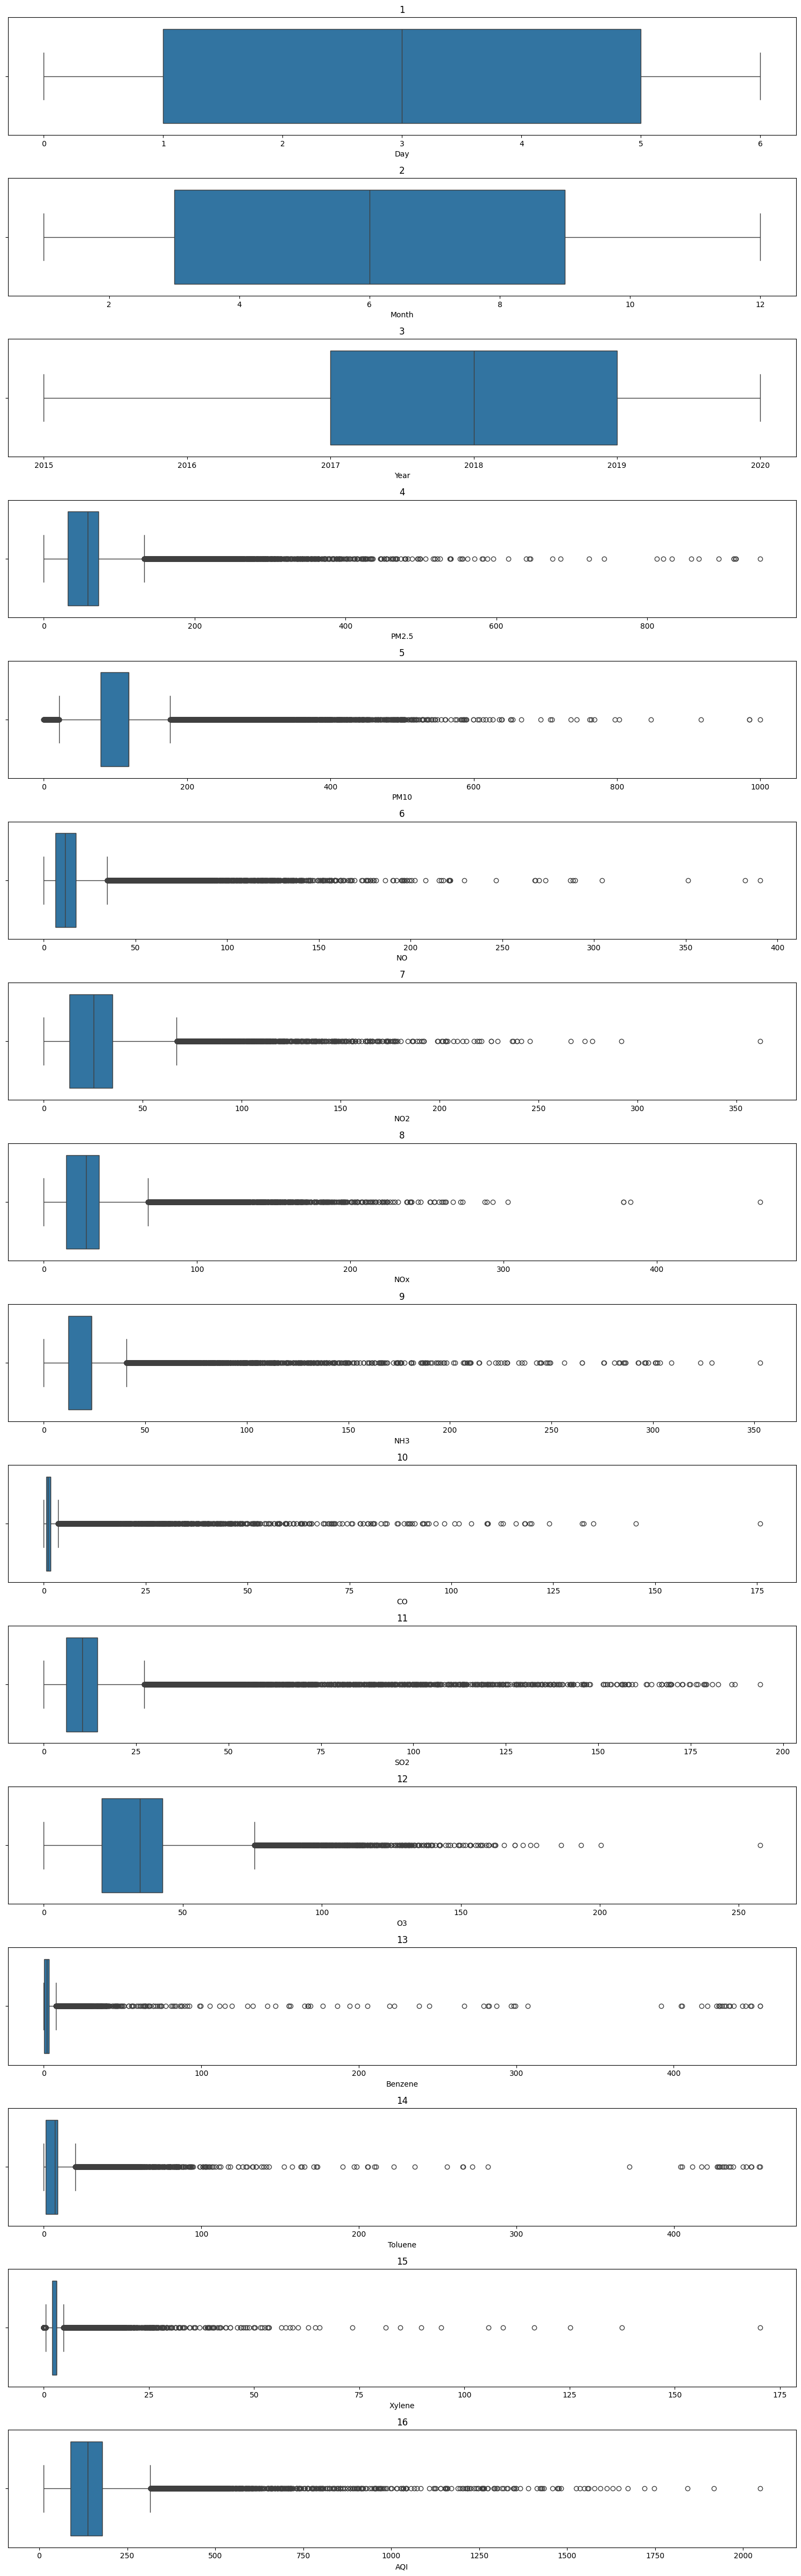

In [ ]:
try:
    # Check and visualize outliers
    print("Lets Check the Outliers of all Columns.\n")
    plt.figure(figsize=(15, 3 * len(temp2)))
    for j in range(1, len(temp2) + 1):
        plt.subplot(len(temp2), 1, j)
        sns.boxplot(x=temp2[j - 1], data=df)
        plt.title(f"{j}")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error {e}")

In [17]:
# Encode categorical columns
print("\nLets Encode the Categorical Data into Numeric format.\n")


Lets Encode the Categorical Data into Numeric format.



In [21]:
#We are use the OrdinalEncoder function for the encode a City Columns into the Datasets.
city_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
df[['City']] = city_encoder.fit_transform(df[['City']])

In [ ]:
try:
    # Encode target column AQI_Bucket
    lb_iqr = LabelEncoder()
    y = df["AQI_Bucket"]
    lb_iqr.fit(y) 
    y = lb_iqr.transform(y)
except Exception as e:
    print(f"Error {e}")

In [23]:
# Prepare features
x = df.drop(columns=["AQI_Bucket"])

In [ ]:
try:
    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
except Exception as e:
   print(f"Erro {e}")

In [ ]:
try: 
    # Handle class imbalance using SMOTE
    sm = SMOTE(random_state=42)
    x_train, y_train = sm.fit_resample(x_train, y_train)
except Exception as e:
    print(f"Erro {e}")

In [ ]:
try:
    # Scaling features for KNN
    std = StandardScaler()
    x_train_scaled = std.fit_transform(x_train)
    x_test_scaled = std.transform(x_test)
except Exception as e:
    print(f"Erro {e}")

In [27]:
print("\nLet see the Training Shape of the dataset.\n")
print(f"Total Training Data: {x_train_scaled.shape[0]} Rows\nTotal Testing Data: {x_test_scaled.shape[0]} Rows")


Let see the Training Shape of the dataset.

Total Training Data: 64482 Rows
Total Testing Data: 5907 Rows


In [ ]:
try:
    # Use KNN Model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train_scaled, y_train)
    y_predict_knn = knn.predict(x_test_scaled)

    print("\nThe Classification Report of this KNN Model is....\n", classification_report(y_test, y_predict_knn))
    print("\nThe Accuracy of the KNN Model is : ", round(accuracy_score(y_test, y_predict_knn) * 100, 2), "%")
    print("\nMean Absolute Error of this KNN Model:", round(mean_absolute_error(y_test, y_predict_knn), 2))
    print("\nMean Squared Error of this KNN Model :", round(mean_squared_error(y_test, y_predict_knn), 2))
    print("\nThe Confustion Matrix is:\n",confusion_matrix(y_test, y_predict_knn))
except Exception as e:
    print(f"Erro {e}")


The Classification Report of this KNN Model is....
               precision    recall  f1-score   support

           0       0.42      0.82      0.56       237
           1       0.88      0.75      0.81      2763
           2       0.53      0.69      0.60       553
           3       0.73      0.75      0.74      1611
           4       0.77      0.79      0.78       272
           5       0.69      0.66      0.67       471

    accuracy                           0.74      5907
   macro avg       0.67      0.74      0.69      5907
weighted avg       0.77      0.74      0.75      5907


The Accuracy of the KNN Model is :  74.08 %

Mean Absolute Error of this KNN Model: 0.52

Mean Squared Error of this KNN Model : 1.21

The Confustion Matrix is:
 [[ 194    4    0   39    0    0]
 [  35 2070  237  402    5   14]
 [   1   92  382    3    1   74]
 [ 227  175    3 1206    0    0]
 [   0    1    4    0  214   53]
 [   0    8   95    0   58  310]]


In [ ]:
try:
      # Use Decision Tree Classification Model
      dtree = DecisionTreeClassifier(max_depth=6, random_state=42)
      dtree.fit(x_train_scaled, y_train)
      y_tree_predict = dtree.predict(x_test_scaled)

      print("\nLet see the Classification Report of this Decision Tree Classifier Model...\n",
            classification_report(y_test, y_tree_predict))
      print("\n Accuracy of Decision Tree Classifier Model : ", round(accuracy_score(y_test, y_tree_predict) * 100, 2), "%")
      print("\nMean Absolute Error of this Decision Tree Classifier Model:", round(mean_absolute_error(y_test, y_tree_predict), 2))
      print("\nMean Squared Error of this Decision Tree Classifier Model :", round(mean_squared_error(y_test, y_tree_predict), 2))
      print("\nThe Confustion Matrix is:\n",confusion_matrix(y_test, y_tree_predict))
except Exception as e:
    print(f"Erro {e}")


Let see the Classification Report of this Decision Tree Classifier Model...
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00      2763
           2       1.00      1.00      1.00       553
           3       1.00      1.00      1.00      1611
           4       1.00      1.00      1.00       272
           5       1.00      1.00      1.00       471

    accuracy                           1.00      5907
   macro avg       1.00      1.00      1.00      5907
weighted avg       1.00      1.00      1.00      5907


 Accuracy of Decision Tree Classifier Model :  100.0 %

Mean Absolute Error of this Decision Tree Classifier Model: 0.0

Mean Squared Error of this Decision Tree Classifier Model : 0.0

The Confustion Matrix is:
 [[ 237    0    0    0    0    0]
 [   0 2763    0    0    0    0]
 [   0    0  553    0    0    0]
 [   0    0    0 1611    0    0]
 [   0    0    0    0  272    0]


In [30]:
df.head()

,City,Day,Month,Year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0.0,3,1,2015,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,Moderate
1,0.0,4,1,2015,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,Moderate
2,0.0,5,1,2015,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,Moderate
3,0.0,6,1,2015,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,Moderate
4,0.0,0,1,2015,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,Moderate


In [ ]:
try:
    # User Input
    print("\nEnter All the Values of your Environment for the Correct Prediction.\n")

    def UserInput():
        City = input("Enter the City Name : ")
        Day = int(input("Enter the Date (Like 12, 15, 29) : "))
        Month = int(input("Enter the Month of Date (Like Jan=1, Feb=2...) : "))
        Year = int(input("Enter the Year of the Date (Like 2015, 2025) : "))
        PM25 = float(input("Enter the 'PM2.5' : "))
        PM10 = float(input("Enter the 'PM10' : "))
        NO = float(input("Enter the 'NO': "))
        NO2 = float(input("Enter the 'NO2': "))
        NOx = float(input("Enter the 'NOx': "))
        NH3 = float(input("Enter the 'NH3': "))
        CO = float(input("Enter the 'CO': "))
        SO2 = float(input("Enter the 'SO2': "))
        O3 = float(input("Enter the 'O3': "))
        Benzene = float(input("Enter the Benzene: "))
        Toluene = float(input("Enter the Toluene: "))
        Xylene = float(input("Enter the Xylene :"))
        AQI = float(input("Enter the AQI :"))

        user_input_data = {
            "City": City,
            "Day": Day,
            "Month": Month,
            "Year": Year,
            "PM2.5": PM25,
            "PM10": PM10,
            "NO": NO,
            "NO2": NO2,
            "NOx": NOx,
            "NH3": NH3,
            "CO": CO,
            "SO2": SO2,
            "O3": O3,
            "Benzene": Benzene,
            "Toluene": Toluene,
            "Xylene": Xylene,
            "AQI": AQI
        }
        
        user_df = pd.DataFrame([user_input_data])
        
        user_df['City'] = city_encoder.transform(user_df[['City']]) 

        # Encode & Scale user input
        user_df_scaled = std.transform(user_df)

        # Make Predictions
        knn_pred_num = knn.predict(user_df_scaled)[0]
        tree_pred_num = dtree.predict(user_df_scaled)[0]

        # Convert numeric predictions to original labels
        knn_pred_label = lb_iqr.inverse_transform([knn_pred_num])[0]
        dtree_pred_label = lb_iqr.inverse_transform([tree_pred_num])[0]

        print("\n==========Prediction Result==========\n")
        print(f"\nKNN Model predicts the Environment is: {knn_pred_label} ({knn_pred_num})")
        print(f"\nDecision Tree Model predicts the Environment is: {dtree_pred_label} ({tree_pred_num})")
        print("\n=====================================\n")


    UserInput()
except Exception as e:
    print(f"Erro {e}")


Enter All the Values of your Environment for the Correct Prediction.


==========Prediction Result==========


KNN Model predicts the Environment is: Moderate (1)

Decision Tree Model predicts the Environment is: Moderate (1)




In [ ]:
try:
    #Make the Pickle Model
    print("Lets Make the Pickle Model for the Fast Api.......\n")

    models = {"Ordinal_city_encoder":city_encoder,
            "label_encoder":lb_iqr,
            "standard_scaler":std,
            "knn_model":knn,
            "dtree_model":dtree   
    }
        
    with open('model/all_models.pkl','wb') as f:
        pickle.dump(models,f)
except Exception as e:
    print(f"Erro {e}")

Lets Make the Pickle Model for the Fast Api.......



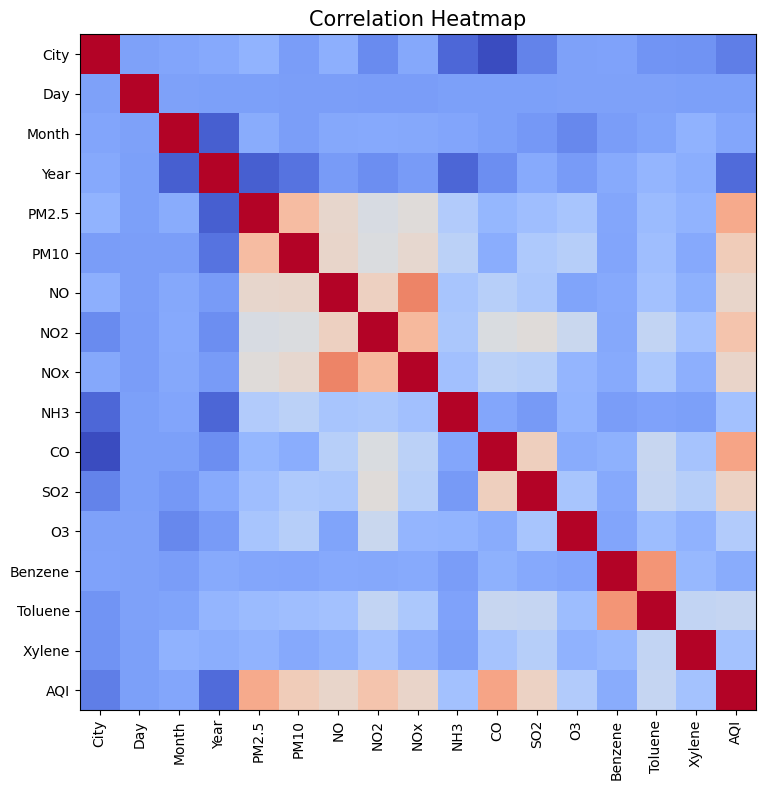

In [ ]:
try:
    #Correlation Heatmap
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none',label='Correlation')
    plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
    plt.title("Correlation Heatmap", fontsize=15)
    plt.tight_layout()
    plt.savefig("Graph images/correlation_heatmap.png",dpi=400,bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Erro {e}")

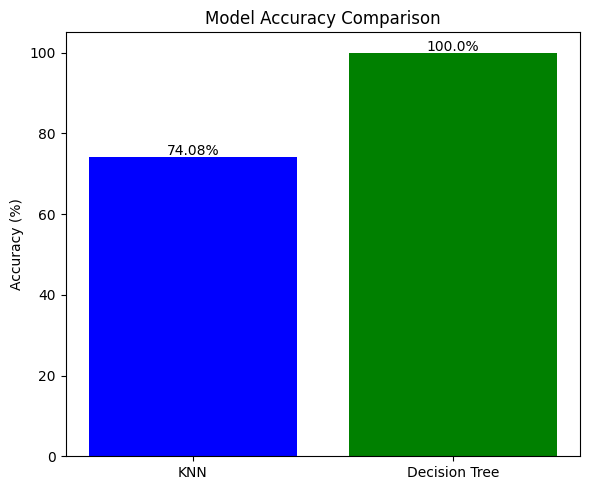

In [ ]:
try:
    #Model Accuracy Comparison

    model_names = ['KNN', 'Decision Tree']
    accuracies = [
        round(accuracy_score(y_test, y_predict_knn) * 100, 2),
        round(accuracy_score(y_test, y_tree_predict) * 100, 2)
    ]

    plt.figure(figsize=(6, 5))
    plt.bar(model_names, accuracies, color=['blue', 'green'])
    plt.ylabel("Accuracy (%)")
    plt.title("Model Accuracy Comparison")
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.5, f"{acc}%", ha='center')
    plt.tight_layout()
    plt.savefig("Graph images/model_accuracy_comparison.png",dpi=400,bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Erro {e}")

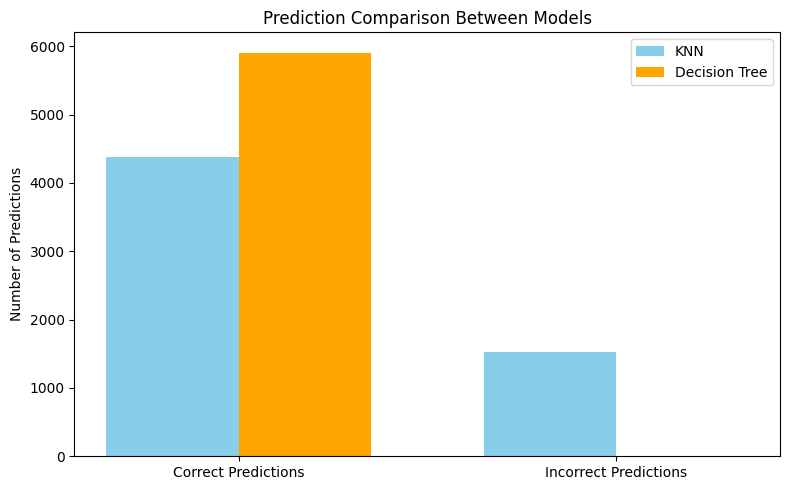

In [ ]:
try:

    #Prediction Comparison

    labels = ["Correct Predictions", "Incorrect Predictions"]

    knn_correct = accuracy_score(y_test, y_predict_knn) * len(y_test)
    knn_incorrect = len(y_test) - knn_correct

    dtree_correct = accuracy_score(y_test, y_tree_predict) * len(y_test)
    dtree_incorrect = len(y_test) - dtree_correct

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, [knn_correct, knn_incorrect], width, label='KNN', color='skyblue')
    plt.bar(x + width/2, [dtree_correct, dtree_incorrect], width, label='Decision Tree', color='orange')

    plt.ylabel("Number of Predictions")
    plt.title("Prediction Comparison Between Models")
    plt.xticks(x, labels)
    plt.legend()
    plt.tight_layout()
    plt.savefig("Graph images/prediction_comparison.png",dpi=400,bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Erro {e}")

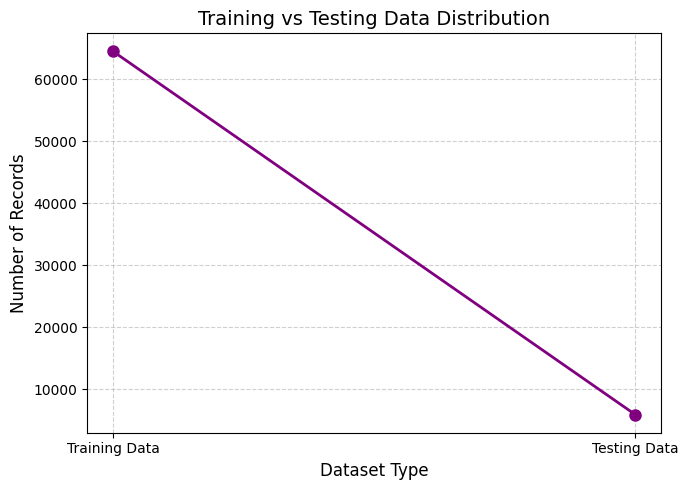

In [ ]:
try:
    # 📈 Line Plot for Training vs Testing Data
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]

    plt.figure(figsize=(7, 5))
    plt.plot(['Training Data', 'Testing Data'], [train_size, test_size], 
            marker='o', linestyle='-', color='purple', linewidth=2, markersize=8)

    plt.title("Training vs Testing Data Distribution", fontsize=14)
    plt.xlabel("Dataset Type", fontsize=12)
    plt.ylabel("Number of Records", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig("Graph images/train_test_lineplot.png", dpi=400, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Erro {e}")

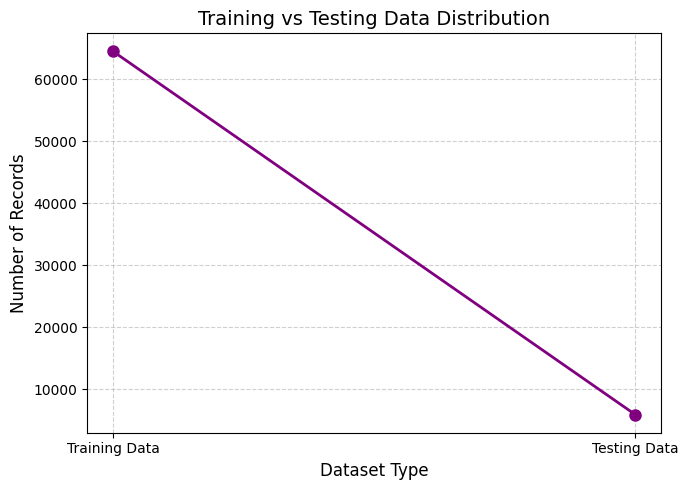

In [ ]:
try:
    # 📈 Line Plot for Training vs Testing Data
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]

    plt.figure(figsize=(7, 5))
    plt.plot(['Training Data', 'Testing Data'], [train_size, test_size], 
            marker='o', linestyle='-', color='purple', linewidth=2, markersize=8)

    plt.title("Training vs Testing Data Distribution", fontsize=14)
    plt.xlabel("Dataset Type", fontsize=12)
    plt.ylabel("Number of Records", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig("Graph images/train_test_lineplot.png", dpi=400, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Erro {e}")